In [1]:
import numpy as np

1. Выполнить обработку элементов матрицы А, имеющей N строк и М столбцов. Найти наибольшее значение среди средних значений для каждой строки матрицы. Сделать с помощью numpy (mean и max) и без него. Запустить с разной размерностью матрицы и замерить время выполнения программы (среднее, максимальное, минимальное). Построить графики.

In [ ]:
a = np.random.random([4, 5])

array([[0.42907738, 0.77218263, 0.93266911, 0.75351437, 0.91427887],
       [0.9283567 , 0.66264861, 0.49990435, 0.64204693, 0.69063302],
       [0.73677283, 0.81379999, 0.87266109, 0.05661326, 0.37152375],
       [0.24816641, 0.1870886 , 0.21167101, 0.95872736, 0.07513031]])

In [9]:
def find_max_np(a):
    means = a.mean(axis=1)
    return np.max(means)
find_max_np(a)

np.float64(0.7603444702379409)

In [13]:
def fin_max_my(a):
    means = []
    for str in a:
        temp = 0
        for el in str:
            temp += el
        means.append(temp/len(str))
    max = float('-inf')
    for mean in means:
        if mean > max:
            max = mean
    return max
fin_max_my(a)

np.float64(0.7603444702379409)

In [66]:
import time
import random
import matplotlib.pyplot as plt

def measure_time(func, *args, repeats=10):
    times = []
    for _ in range(repeats):
        start_time = time.perf_counter()
        func(*args)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    return np.mean(times), np.min(times), np.max(times)

def draw_plot(func1, func2):
    sizes = [i*5 for i in range(1, 7)]
    time_gcd_mean = []
    time_gcd_min = []
    time_gcd_max = []

    time_gcd2_mean = []
    time_gcd2_min = []
    time_gcd2_max = []

    for size in sizes:
        a = np.random.random([size, 5 * size])

        mean_gcd, min_gcd, max_gcd = measure_time(func1, a)
        time_gcd_mean.append(mean_gcd)
        time_gcd_min.append(min_gcd)
        time_gcd_max.append(max_gcd)

        mean_gcd2, min_gcd2, max_gcd2 = measure_time(func2, a)
        time_gcd2_mean.append(mean_gcd2)
        time_gcd2_min.append(min_gcd2)
        time_gcd2_max.append(max_gcd2)


    plt.figure(figsize=(12, 6))

    plt.plot(sizes, time_gcd_mean, label="func1", marker='o', color='blue')

    plt.fill_between(sizes, time_gcd_min, time_gcd_max, alpha=0.2, color='blue')

    plt.plot(sizes, time_gcd2_mean, label="func2", marker='o', color='orange')
    plt.fill_between(sizes, time_gcd2_min, time_gcd2_max, alpha=0.2, color='orange')

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Размер чисел")
    plt.ylabel("Время выполнения (секунды)")
    plt.title("Сравнение")
    plt.legend()
    plt.grid(True)
    plt.show()

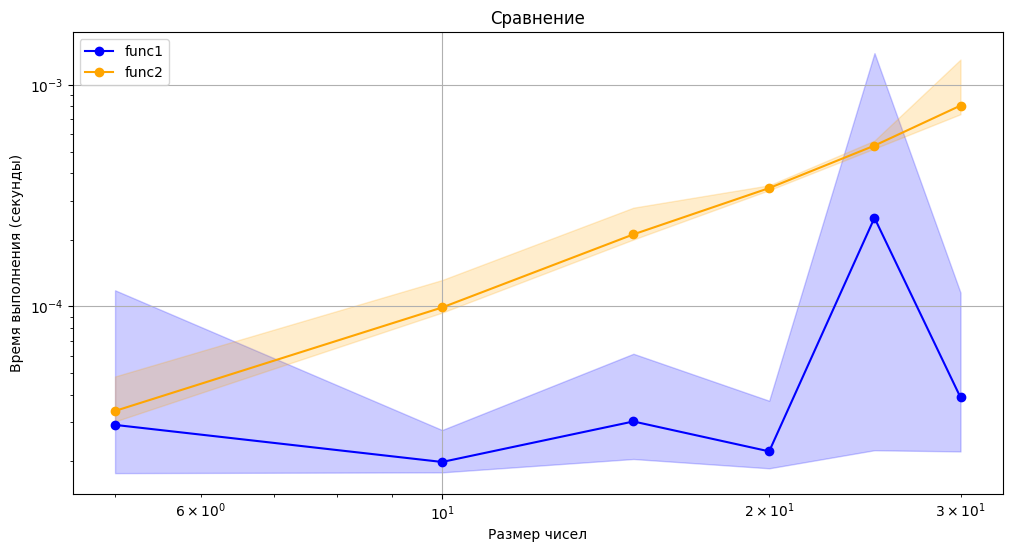

In [67]:
draw_plot(find_max_np, fin_max_my)

2. Выполнить обработку элементов матрицы А, имеющей N строк и М столбцов. Найти наименьший элемент строки матрицы А, для которого сумма абсолютных значений элементов максимальна (np.argmax и np.min). Сделать с помощью numpy (mean и max) и без него. Запустить с разной размерностью матрицы и замерить время выполнения программы (среднее, максимальное, минимальное). Построить графики.

In [30]:
a = np.random.random([4, 5])

In [38]:
def find_min_np(a):
    abs_sums = np.sum(np.abs(a), axis=1)
    target_row = a[np.argmax(abs_sums)]
    return np.min(target_row)
find_min_np(a)

np.float64(0.4985178172457708)

In [55]:
def find_min_my(a):
    abs_sums = [sum(abs(el) for el in str) for str in a]
    max = float('-inf')
    for el in abs_sums:
        if el > max:
            max = el
    target_row = a[abs_sums.index(max)]
    return min(target_row)
find_min_my(a)

np.float64(0.4985178172457708)

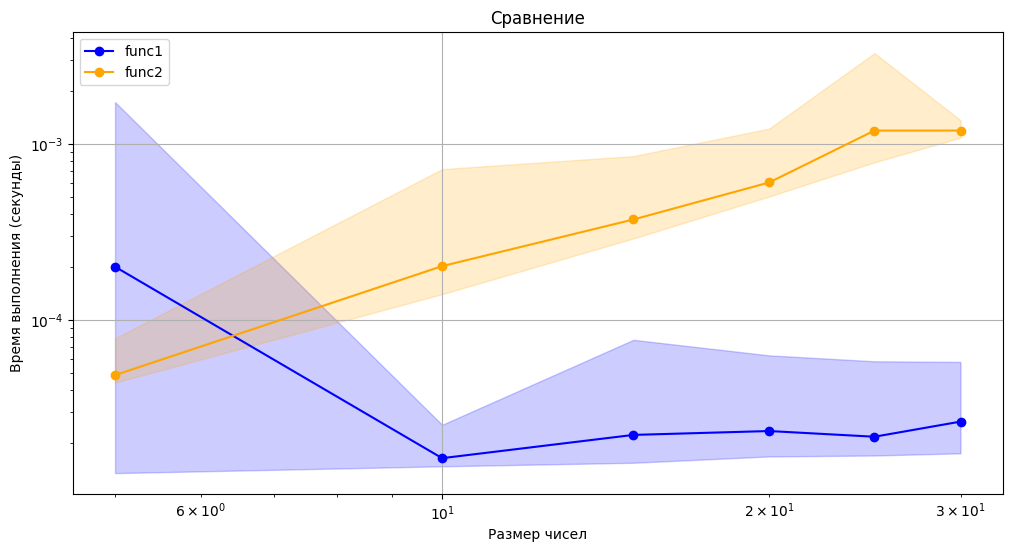

In [68]:
draw_plot(find_min_np, find_min_my)

3. Выполнить обработку элементов матрицы А, имеющей N строк и М столбцов. Найти наименьшее значение среди средних значений для каждого столбца матрицы. Запустить с разной размерностью матрицы и замерить время выполнения программы (среднее, максимальное, минимальное). Построить графики.

In [57]:
a = np.random.random([4, 5])

In [59]:
def find_min_mean_np(a):
    return np.min(np.mean(a, axis=0))
find_min_mean_np(a)

np.float64(0.29619801926206335)

In [64]:
def find_min_mean_my(a):
    means = []
    for j in range(a.shape[1]):
        temp = 0
        for i in range(a.shape[0]):
            temp += a[i][j]
        means.append(temp/a.shape[0])
            
    return min(means)
find_min_mean_my(a)

np.float64(0.29619801926206335)

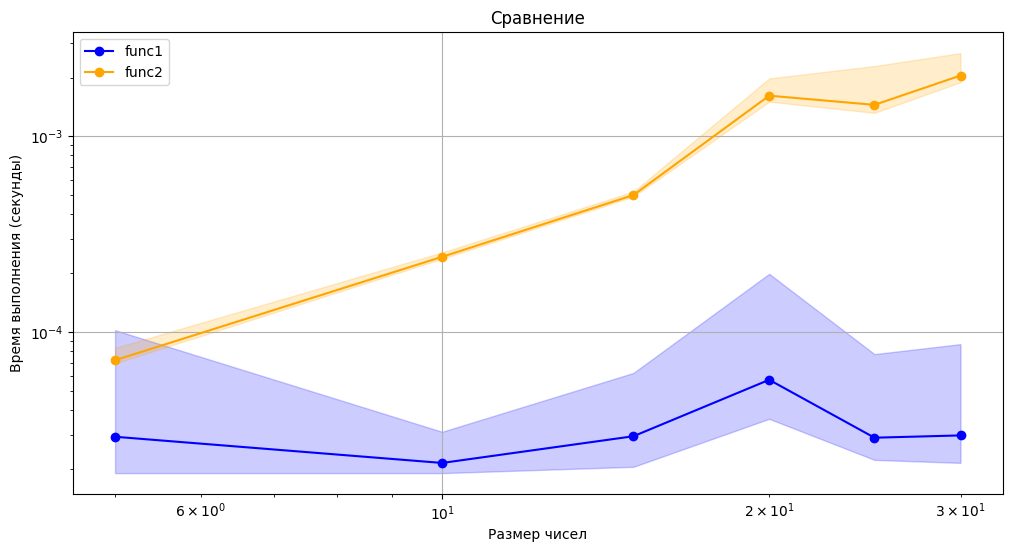

In [69]:
draw_plot(find_min_mean_np, find_min_mean_my)

4. Выполнить обработку элементов матрицы А, имеющей N строк и М столбцов. Определить средние значения по всем строкам, столбцам матрицы и по всей матрицы. Запустить с разной размерностью матрицы и замерить время выполнения программы (среднее, максимальное, минимальное). Построить графики.

In [ ]:
a = np.random.random([4, 5])

In [70]:
def find_means_np(a):
    return np.mean(a), np.mean(a, axis=1), np.mean(a, axis=0)
find_means_np(a)

(np.float64(0.46462354556974733),
 array([0.49387253, 0.49337321, 0.46697399, 0.40427446]),
 array([0.29619802, 0.5299044 , 0.48465873, 0.48561993, 0.52673665]))

In [77]:
def find_means_my(a):
    mean_str = [float(sum(str)/len(str)) for str in a]
    mean_stb = []
    for j in range(a.shape[1]):
        temp = 0
        for i in range(a.shape[0]):
            temp += a[i][j]
        mean_stb.append(float(temp/a.shape[0]))
    mean = sum(mean_str)/len(mean_str)
    return mean, mean_str, mean_stb

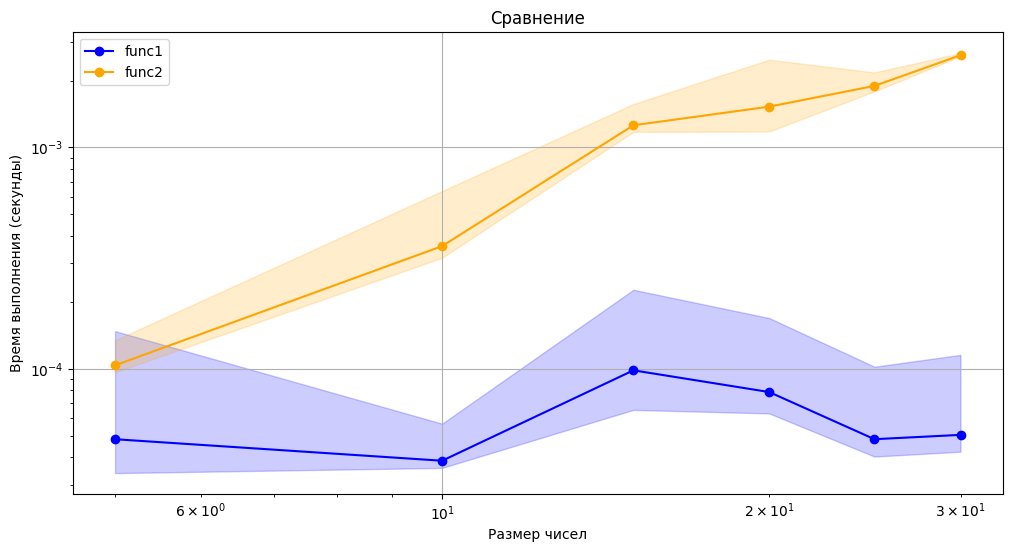

In [78]:
draw_plot(find_means_np, find_means_my)

5. Выполнить обработку элементов матрицы A, имеющей N строк и M столбцов. Каждый элемент подматрицы, умножить на заданное число. Запустить с разной размерностью матрицы и замерить время выполнения программы (среднее, максимальное, минимальное). Построить графики.

In [80]:
a = np.random.random([4, 5])

In [86]:
def mul_np(a, x=5):
    return a*x
mul_np(a, 5)

array([[4.11755501, 0.25872597, 1.85629091, 4.13863861, 3.14170656],
       [3.19480036, 1.90898271, 2.69063481, 1.00896074, 3.808855  ],
       [2.40739232, 1.91285966, 0.16206518, 2.30187407, 0.52694704],
       [1.84736423, 1.28355199, 4.06350305, 0.97108639, 4.95276386]])

In [87]:
def mul_my(a, x=5):
    a_copy = a.copy()
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a_copy[i][j] *= x
    return a_copy
mul_my(a, 5)

array([[4.11755501, 0.25872597, 1.85629091, 4.13863861, 3.14170656],
       [3.19480036, 1.90898271, 2.69063481, 1.00896074, 3.808855  ],
       [2.40739232, 1.91285966, 0.16206518, 2.30187407, 0.52694704],
       [1.84736423, 1.28355199, 4.06350305, 0.97108639, 4.95276386]])

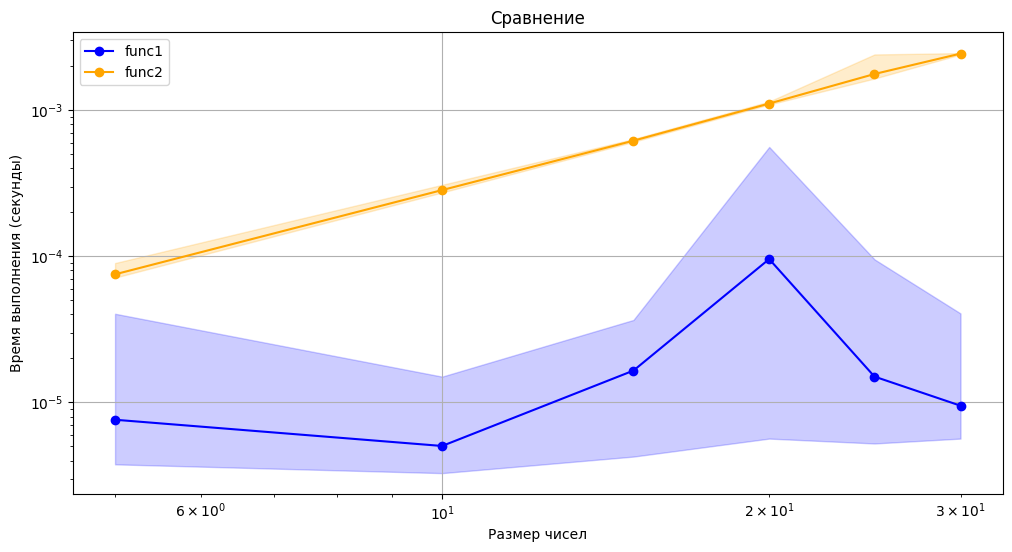

In [88]:
draw_plot(mul_np, mul_my)